In [35]:
# Import the dependencies.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
# Read the data into a Pandas DataFrame
campaign = pd.read_csv('Resources/campaign.csv')
campaign.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13 06:00:00,2021-03-01 06:00:00,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25 06:00:00,2021-05-25 05:00:00,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17 06:00:00,2021-12-30 06:00:00,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21 05:00:00,2022-01-17 06:00:00,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21 06:00:00,2021-08-23 05:00:00,cat4,subcat4


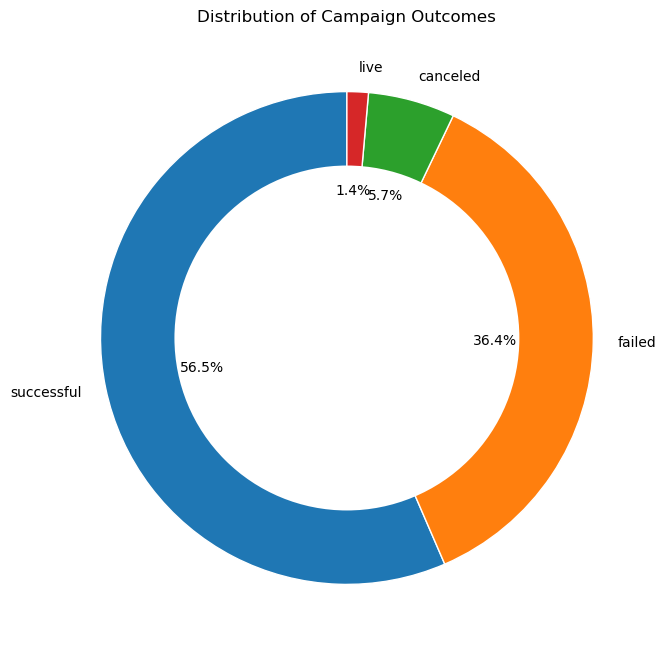

In [42]:
# Count the number of failed and successful campaigns
outcome_counts = campaign['outcome'].value_counts()

# Plotting the donut chart
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Draw a circle at the center of pie to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Distribution of Campaign Outcomes')

# Show the plot
plt.show()

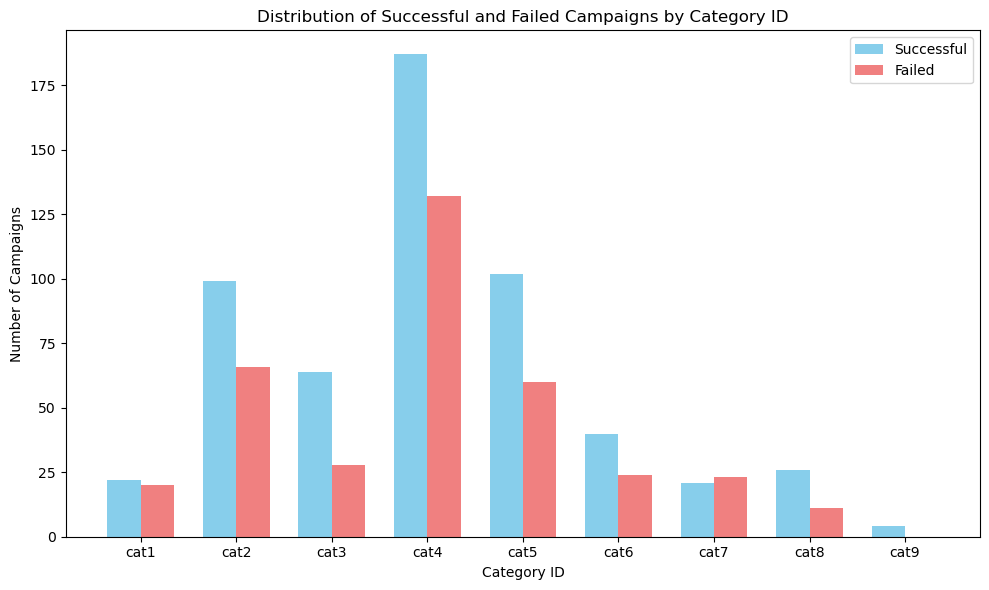

In [45]:
# Count successful and failed campaigns by category_id
category_counts = campaign.groupby(['category_id', 'outcome']).size().unstack(fill_value=0)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Positioning the bars
categories = category_counts.index
bar_width = 0.35
x = range(len(categories))
successful_bars = ax.bar(x, category_counts['successful'], width=bar_width, label='Successful', color='skyblue')
failed_bars = ax.bar([i + bar_width for i in x], category_counts['failed'], width=bar_width, label='Failed', color='lightcoral')

# Add labels and title
ax.set_xlabel('Category ID')
ax.set_ylabel('Number of Campaigns')
ax.set_title('Distribution of Successful and Failed Campaigns by Category ID')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(categories)
ax.legend()

# Show plot
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [47]:
# Read the data into a Pandas DataFrame
category = pd.read_csv('Resources/category.csv')
category

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [50]:
category_counts = campaign['category_id'].value_counts().sort_index()

print("Category Counts:")
print(category_counts)

Category Counts:
category_id
cat1     46
cat2    175
cat3     96
cat4    344
cat5    178
cat6     67
cat7     48
cat8     42
cat9      4
Name: count, dtype: int64
